<a href="https://colab.research.google.com/github/RamyaGuru/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/AtomVisionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example to run [AtomVision](https://github.com/usnistgov/atomvision)

AtomVision is a deep learning package to perform various operations on image data including segmentation and classification of images. 

# Table of Contents
1. Install [AtomVision](https://github.com/usnistgov/atomvision) package
2. Train DenseNet classification model on JARVIS-DFT 2D STEM image dataset
3. Plot example images from each heuristic image class

# Get the repository and install

In [1]:
!rm -rf atomvision
import os
!git clone https://github.com/usnistgov/atomvision.git
os.chdir('atomvision')
!git checkout aims
!python setup.py develop

Cloning into 'atomvision'...
remote: Enumerating objects: 1502, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 1502 (delta 21), reused 31 (delta 12), pack-reused 1453
Receiving objects: 100% (1502/1502), 191.10 MiB | 23.41 MiB/s, done.
Resolving deltas: 100% (227/227), done.
Branch 'aims' set up to track remote branch 'aims' from 'origin'.
Switched to a new branch 'aims'
running develop
running egg_info
creating atomvision.egg-info
writing atomvision.egg-info/PKG-INFO
writing dependency_links to atomvision.egg-info/dependency_links.txt
writing requirements to atomvision.egg-info/requires.txt
writing top-level names to atomvision.egg-info/top_level.txt
writing manifest file 'atomvision.egg-info/SOURCES.txt'
adding license file 'LICENSE.md'
writing manifest file 'atomvision.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/atomvision.egg-link (link to .)
atomvision 2021.10.11 is alre

# Example Plots for Each Image Class

The convolutional neural network classifies the structures into the 5 categories of STM images. Here, we print out example images from each category to look at their shared characteristics. Each image is labelled here with its composition and space group.

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

#List the class sub-folders generated by the neural network
test_folder = "atomvision/data/classification/stem_jv2d/test_folder/"

os.listdir(test_folder)

['4', '2', '1', '3', '0']

In [10]:
#Load the JARVIS-DFT 2D Dataset to maatch JARVIS-ID to spacegroup
from jarvis.core.atoms import Atoms
from jarvis.db.figshare import data
dft_2d = data("dft_2d")

Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 8.20M/8.20M [00:01<00:00, 7.40MiB/s]


Loading the zipfile...
Loading completed.


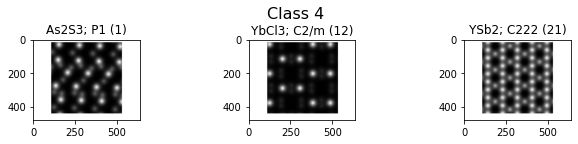

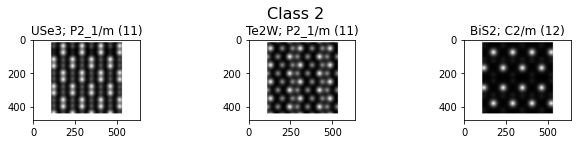

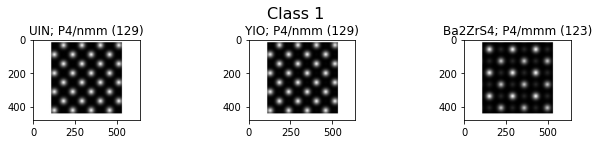

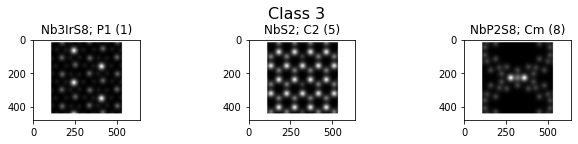

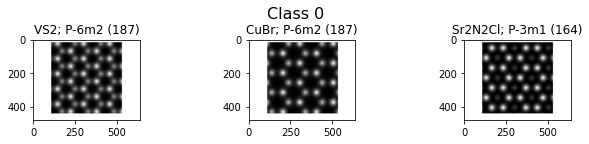

In [11]:
%matplotlib inline
for cls in os.listdir(test_folder):
  fig, ax = plt.subplots(1,3, figsize = (9,2))
  fig.tight_layout(w_pad = 2)
  fig.subplots_adjust(top=0.75)
  fig.suptitle('Class {}'.format(cls), fontsize=16)
  i = 1
  for img in os.listdir(test_folder + cls)[:3]:
    plt.subplot(1,3,i)
    plt.imshow(plt.imread(test_folder + cls + "/" + img))
    start = img.find('JVASP')
    end = img.find('.jpg')
    jid = img[start:end]
    entry = next(j for j in dft_2d if j["jid"] == jid)
    atoms = Atoms.from_dict(entry["atoms"])
    comp = atoms.composition.reduced_formula
    spg = atoms.spacegroup()
    plt.title("{}; {}".format(comp, spg)) #Label by composition and space group.
    i = i+1
plt.show()

# Train DenseNet pretrained model on JARVIS-DFT 2D materials' STEM images generated with convolution approximation

Datasets can be generated with STM/STEM sections of the data folder with generate_data.py script or pre-populated image datasets can be downloaded with 'download.py`. We create two folders ``train_folder``, ``test_folder`` with sub-folders ``0,1,2,3,4,...`` for individual classes and they contain images for these classes such that the train-test splits have a proportionate number of images. An example for using pre-trained densenet on STEM JARVIS-DFT 2D dataset is given below. Change ``train_folder`` and ``test_folder`` paths in order to use a different dataset.


The classification model chosen here is the DenseNet (reference [paper](https://paperswithcode.com/method/dense-block)), which include "dense blocks", modules in which all the layers of the neural network are directly connected to one another. 

**Try Modifying** 
1. Other classification models (such as [ResNet](https://paperswithcode.com/method/resnet) or [VGG](https://paperswithcode.com/method/vgg)) can be trialled as well by substitute (using ``model_name`` tag)
2. Number of training epochs (using ``epochs`` tag)
3. Batch size (using ``batch_size`` tag)
4. Loss function (using ``criterion`` tag)

In [3]:
!python atomvision/scripts/train_classifiers.py --model_name densenet --epochs 15 --train_folder atomvision/data/classification/stem_jv2d/train_folder --test_folder atomvision/data/classification/stem_jv2d/test_folder


Training Results - Epoch: 1  Avg accuracy: 53.20 Avg loss: 14.78
Validation Results - Epoch: 1  Avg accuracy: 49.77 Avg loss: 13.48
Training Results - Epoch: 2  Avg accuracy: 59.95 Avg loss: 1.66
Validation Results - Epoch: 2  Avg accuracy: 61.29 Avg loss: 1.25
Training Results - Epoch: 3  Avg accuracy: 48.43 Avg loss: 9.47
Validation Results - Epoch: 3  Avg accuracy: 49.31 Avg loss: 6.64
Training Results - Epoch: 4  Avg accuracy: 69.50 Avg loss: 0.89
Validation Results - Epoch: 4  Avg accuracy: 70.05 Avg loss: 0.83
Training Results - Epoch: 5  Avg accuracy: 71.48 Avg loss: 0.79
Validation Results - Epoch: 5  Avg accuracy: 70.51 Avg loss: 0.79
Training Results - Epoch: 6  Avg accuracy: 59.60 Avg loss: 1.25
Validation Results - Epoch: 6  Avg accuracy: 58.53 Avg loss: 1.10
Training Results - Epoch: 7  Avg accuracy: 76.02 Avg loss: 0.70
Validation Results - Epoch: 7  Avg accuracy: 76.96 Avg loss: 0.65
Training Results - Epoch: 8  Avg accuracy: 70.31 Avg loss: 0.87
Validation Results - Epo

In [6]:
#Show any output files that have been generated
!ls

Acc.png		     CM.png	    Loss.png		  README.md
atomvision	     CODEMETA.yaml  output_output_378.pt  setup.py
atomvision.egg-info  LICENSE.md     output_output_405.pt


## Show Performance Metrics Using Test Set

Metrics used to train the classifier include the _accuracy_, _loss_, and _confusion matrix_. Each of which is discussed and plotted out below.

**Accuracy versus Training Epochs**

The classification accuracy is calculated from the relative number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN). It equals the number of correct predictions divided by the total number of predictions.

$\mathrm{Accuracy} = \frac{(TP + TN)}{(TP + FN + FP + TN)}$

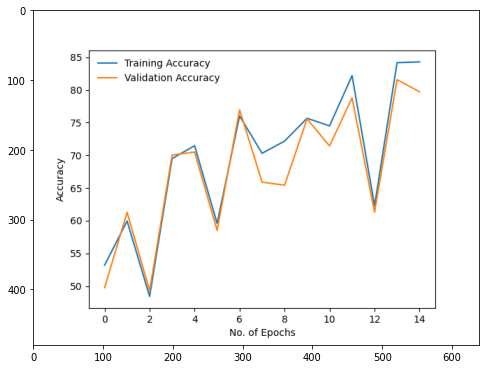

In [7]:
import matplotlib.image as mpimg
plt.figure(figsize = (8,8))
img = mpimg.imread('Acc.png')
imgplot = plt.imshow(img)

**Loss versus Training Epochs**

The default loss function is the negative log likelihood, which should be minimzed in order to have the highest probabilities associated with correctly labelled samples.

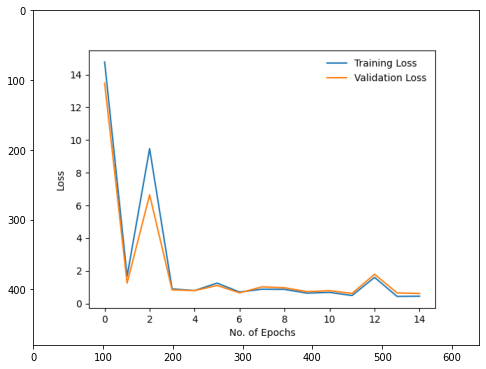

In [8]:
plt.figure(figsize = (8,8))
img = mpimg.imread('Loss.png')
imgplot = plt.imshow(img)

**Confusion Matrix**

The confusion matrix provides a visual representation of the performance of the classification model. The ``true`` labels are shown along the vertical axis, while the ``predicted`` labels are given along the horizontal axis. Any sample that lies along the diagonal is correctly classified, while off-diagonal samples are incorrectly classified. 

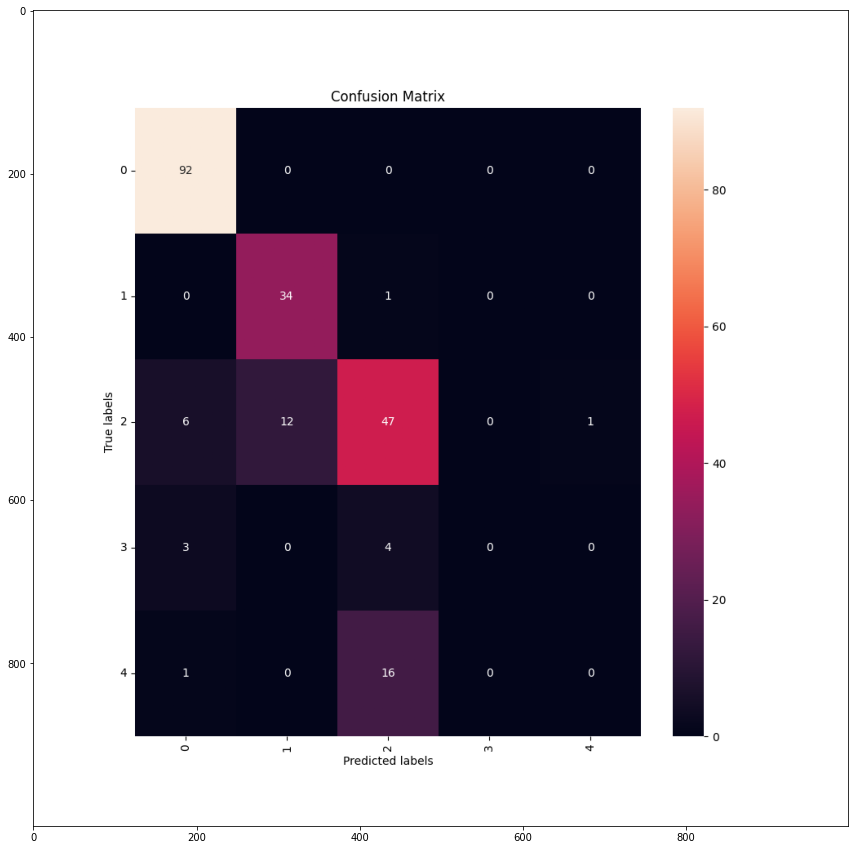

In [9]:
plt.figure(figsize = (15,15))
img = mpimg.imread('CM.png')
imgplot = plt.imshow(img)